In [85]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading data

In [86]:
from sklearn.datasets import load_iris
iris = load_iris()

## Generating training data

In [87]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [129]:
X

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

## Generating testing data

In [88]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

## Gradient Descent process

In [89]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [91]:
def compute_loss(y_hat, y_true):
    return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

In [92]:
def compute_gradient(X, y_true, y_hat):
    m = X.shape[0]
    return (1 / m) * X.T @ (y_hat - y_true)

In [93]:
def initializers(X):
    return np.zeros(X.shape[1])

In [94]:
def fit(X, y, alpha=0.01, max_iter=100):
    w = initializers(X)
    m = X.shape[0]
    list_of_loss = []
    for _ in range(max_iter):
        y_hat = sigmoid(X @ w)
        loss = compute_loss(y_hat, y)
        list_of_loss.append(loss)
        gradient = compute_gradient(X, y, y_hat)
        w -= alpha * gradient
    return w, list_of_loss

In [95]:
def predict(X_test, w):
    y_hat = sigmoid(X_test @ w)
    results = (y_hat >= 0.5).astype(int)
    return results

## Câu 1: Huấn luyện mô hình Logistic Regression với siêu tham số $\alpha=0.1$ và iter=100

In [96]:
w, list_of_loss = fit(X, y, 0.1, 100)
w

array([-1.21750324,  0.75168712])

## Câu 2: Dùng tham số $\theta$ vừa huấn luyện được, dự đoán 100 dòng dữ liệu đầu tiên từ tập dữ liệu gốc, so sánh kết quả dự đoán và tính độ chính xác

In [97]:
X_100 = X[:100]
y_100 = y[:100]

In [98]:
y_pred_100 = predict(X_100, w)

In [99]:
print(f'Accuracy Score: {accuracy_score(y_pred_100, y_100)}')

Accuracy Score: 0.98


## Câu 3: Tính giá trị hàm mất mát ở mỗi lần lặp, đưa vào list loss và vẽ biểu đồ giá trị loss

In [100]:
list_of_loss

[0.6931471805599454,
 0.6898081929359506,
 0.6865135562525475,
 0.68326143483594,
 0.6800501951271014,
 0.6768783787862813,
 0.6737446794107188,
 0.670647922383537,
 0.6675870474352914,
 0.6645610935549998,
 0.6615691859356774,
 0.6586105246813095,
 0.655684375038612,
 0.6527900589485388,
 0.6499269477399334,
 0.6470944558115028,
 0.6442920351689252,
 0.641519170701767,
 0.638775376100377,
 0.6360601903263342,
 0.6333731745616493,
 0.6307139095719749,
 0.6280819934277951,
 0.6254770395351074,
 0.6228986749336368,
 0.6203465388262801,
 0.6178202813083654,
 0.6153195622695554,
 0.6128440504448834,
 0.6103934225945871,
 0.6079673627951524,
 0.6055655618263557,
 0.6031877166411509,
 0.600833529907029,
 0.5985027096090149,
 0.5961949687058058,
 0.5939100248317013,
 0.5916476000379831,
 0.5894074205682531,
 0.5871892166630007,
 0.5849927223893011,
 0.5828176754921193,
 0.5806638172641663,
 0.578530892431681,
 0.5764186490538661,
 0.574326838434025,
 0.5722552150407105,
 0.5702035364374355,
 

In [101]:
loss_df = pd.DataFrame({'Iteration': range(1, len(list_of_loss) + 1), 'Loss':list_of_loss})

<Axes: xlabel='Iteration', ylabel='Loss'>

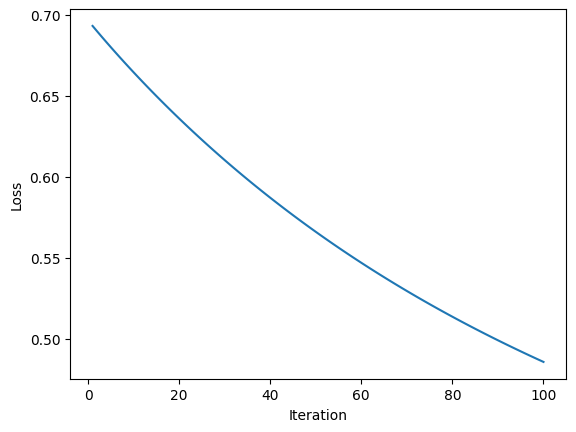

In [102]:
import seaborn as sns
sns.lineplot(data=loss_df, x='Iteration', y='Loss', markers='o')

## Câu 4: Dùng tham số $\theta$ vừa huấn luyện được từ mô hình dự đoán cho dữ liệu X_new

In [103]:
X_new = np.hstack([X_new, np.zeros((X_new.shape[0], 1))])

In [104]:
y_pred_new = predict(X_new, w)
y_pred_new

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Câu 5: Sử dụng thư viện Logistic Regression trong sklearn để dự đoán, so sánh kết quả khi dùng thư viện và làm bằng tay đối với bài 2 và bài 4

In [105]:
lr = LogisticRegression()

In [106]:
lr.fit(X, y)

LogisticRegression()

#### Bài 2 khi dùng thư viện

In [107]:
y_pred_sklearn = lr.predict(X_100)

In [108]:
print(f'Accuracy Score: {accuracy_score(y_pred_sklearn, y_100)}')

Accuracy Score: 0.98


#### Bài 4 khi dùng thư viện

In [109]:
y_pred_new_sklearn = lr.predict(X_new)

In [110]:
y_pred_new_sklearn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
print(f'Matching Ratio: {accuracy_score(y_pred_new_sklearn, y_pred_new)}')

Matching Ratio: 0.999


#### Nhận xét kết quả bài 2 và bài 4 khi sử dụng thư viện và dùng bằng tay
* Đối với bài 2:
    * Cả hai cách là dùng thư viện và làm bằng tay đều cho độ chính xác là 98%
* Đối với bài 4:
    * Khi dùng thư viện, dữ liệu đầu tiên được dự đoán là 0, còn khi làm bằng tay thì dữ liệu đầu tiên được dự đoán là 1, còn lại các kết quả dự đoán là giống nhau, và tỉ lệ trùng khớp là 99,99%

## Bài 6: Hãy sử dụng các thuộc tính khác như Petal Length, Sepal Length, Sepal Width để huấn luyện mô hình, và cho biết kết quả

In [114]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Sử dụng Petal Length (PL)

In [131]:
X_PL = iris['data'][:, 2:3]

In [132]:
intercept = np.ones((X_PL.shape[0], 1))
X_PL = np.concatenate((intercept, X_PL), axis=1)

In [133]:
theta_PL, _ = fit(X_PL, y, 0.1, 100)
theta_PL

array([-1.25722258,  0.26135393])

In [134]:
X_PL_100 = X_PL[:100]

In [135]:
y_pred_PL_100 = predict(X_PL_100, theta_PL)
print(f"Accuracy Score: {accuracy_score(y_pred_PL_100, y_100)}")

Accuracy Score: 0.96


### Sử dụng Sepal Length (SL)

In [127]:
X_SL = iris['data'][:, 0:1]

In [136]:
intercept = np.ones((X_SL.shape[0], 1))
X_SL = np.concatenate((intercept, X_SL), axis=1)

In [137]:
theta_SL, _ = fit(X_SL, y, 0.1, 100)
theta_SL

array([-0.43974237, -0.01220351])

In [138]:
X_SL_100 = X_SL[:100]

In [139]:
y_pred_SL_100 = predict(X_SL_100, theta_SL)
print(f"Accuracy Score: {accuracy_score(y_pred_SL_100, y_100)}")

Accuracy Score: 1.0


### Sepal Width (SW)

In [126]:
X_SW = iris['data'][:, 1: 2]

In [140]:
intercept = np.ones((X_SW.shape[0], 1))
X_SW = np.concatenate((intercept, X_SW), axis=1)

In [141]:
theta_SW, _ = fit(X_SW, y, 0.1, 100)
theta_SW

array([-0.01354387, -0.23083637])

In [142]:
X_SW_100 = X_SW[:100]

In [143]:
y_pred_SW_100 = predict(X_SW_100, theta_SW)
print(f"Accuracy Score: {accuracy_score(y_pred_SW_100, y_100)}")

Accuracy Score: 1.0


## Comparing Results

In [144]:
results = {
    'Feature': ['Petal Width', 'Petal Length', 
                'Sepal Length', 'Sepal Width'],
    'Accuracy': [0.98, 0.96, 1.0, 1.0],
    'Parameters': ['alpha=0.1, max_iter=100', 'alpha=0.1, max_iter=100',
                   'alpha=0.1, max_iter=100', 'alpha=0.1, max_iter=100']
}

In [145]:
result_df = pd.DataFrame(results)

In [146]:
import IPython.display as display
display.display(result_df)

,Feature,Accuracy,Parameters
0,Petal Width,0.98,"alpha=0.1, max_iter=100"
1,Petal Length,0.96,"alpha=0.1, max_iter=100"
2,Sepal Length,1.00,"alpha=0.1, max_iter=100"
3,Sepal Width,1.00,"alpha=0.1, max_iter=100"
